<a href="https://colab.research.google.com/github/RiveroMilagros/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import random

# Define las columnas del DataFrame
columnas = ['Apellido', 'Nombre', 'Nro_DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas']

# Crea una lista de apellidos y nombres aleatorios
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Fernandez', 'Gomez', 'Lopez', 'Diaz', 'Martinez', 'Sanchez', 'Romero']
nombres = ['Maria', 'Jose', 'Juan', 'Ana', 'Luis', 'Pedro', 'Carlos', 'Sofia', 'Laura', 'Diego']

# Crea una lista de materias de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Inglés', 'Historia', 'Geografía', 'Biología', 'Física', 'Química', 'Educación Física', 'Arte']

# Crea una lista de datos aleatorios para las filas
datos = []
for i in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 50000000)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  datos.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crea el DataFrame
df = pd.DataFrame(datos, columns=columnas)

# Muestra el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas
0,Romero,Carlos,43310851,Educación Física,3,4,1,13
1,Diaz,Laura,49315139,Educación Física,10,8,7,12
2,Fernandez,Juan,46405032,Geografía,10,2,2,2
3,Romero,Pedro,14848676,Inglés,3,10,5,13
4,Sanchez,Ana,36236664,Historia,2,8,3,3
...,...,...,...,...,...,...,...,...
95,Gomez,Pedro,26949110,Física,10,4,8,15
96,Sanchez,Laura,12376351,Biología,3,7,3,17
97,Rodriguez,Jose,37210706,Matemática,8,9,2,10
98,Lopez,Laura,25917200,Educación Física,1,3,5,18


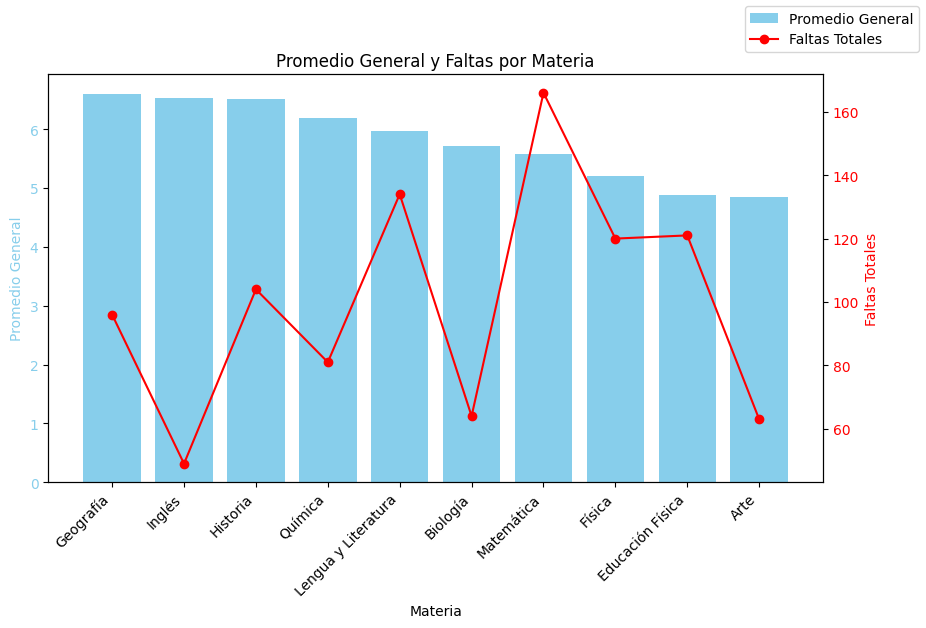

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el promedio general de cada materia
promedios = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Calcular las faltas totales por materia
faltas_totales = df.groupby('Materia')['Faltas'].sum()

# Ordenar las materias por promedio de mayor a menor
materias_ordenadas = promedios.sort_values(ascending=False).index

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para el promedio general
ax1.bar(materias_ordenadas, promedios[materias_ordenadas], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(materias_ordenadas, faltas_totales[materias_ordenadas], color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params('y', labelcolor='red')

# Ajustar las etiquetas del eje x
fig.autofmt_xdate(rotation=45, ha='right')

# Agregar título y leyenda
plt.title('Promedio General y Faltas por Materia')
fig.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)